# bigquery guide

## 빅쿼리
google cloud platform에서 제공하는 data warehouse 솔루션으로 대량의 데이터를 SQL을 이용하여 분석할 수 있는 솔루션으로 실제로 많은 스타트업들이 사용합니다. 일반 데이터 베이스로는 처리하기 힘든 대용량의 데이터를 분석할 목적으로사용합니다.

## 사용법
다양한 사용법이 있지만, 이 가이드에서는 CSV 파일을 google cloud storage에 업로드하고, 이를 bigquery에서 import 한 뒤, SQL을 돌려보는 것을 목적으로 합니다.

## 사용할 데이터 셋
데이터 베이스 수업 시간에 다뤘던 olist 데이터 셋으로 진행해보겠습니다.

## google cloud platform에 로그인

https://cloud.google.com/

구글 아이디가 있으면 바로 로그인 가능합니다.  
결제 정보를 등록해야 솔루션들을 사용 가능한데, 결제 정보 등록하면 300달러 크레딧을 줍니다.  
이 크레딧을 다 사용하기 전까지는 결제 일어나지 않음.

## google cloud storage에 업로드

google cloud storage는 일종의 구글 드라이브라고 생각하면 됩니다.   
빅쿼리 테이블에 데이터를 올려놓기 전에 파일 형태의 데이터는 먼저 google cloud storage에 올려놓으면 처리하기가 편합니다.

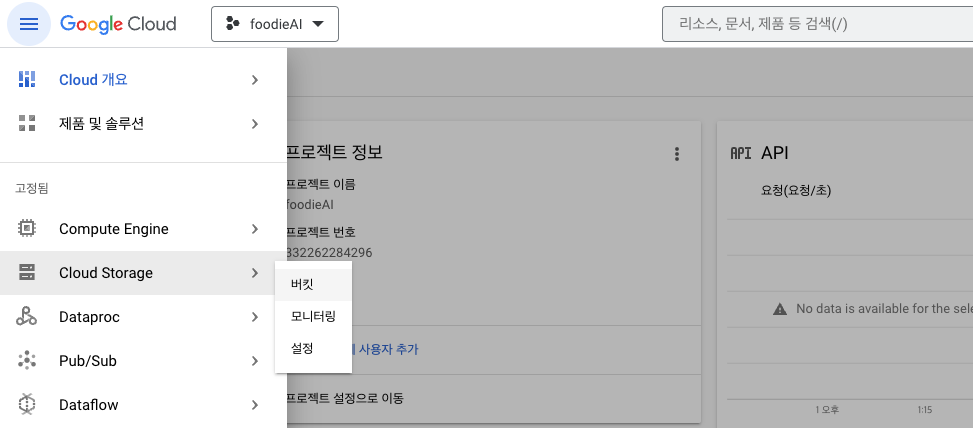

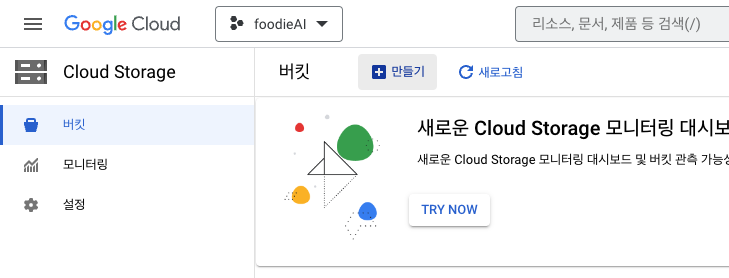

Region - 서울로 지정하고 나머지는 기본 값으로 놓고 버킷을 생성합니다.  
버킷은 구글 드라이브 안에 일종의 폴더라고 생각하면 됩니다. 

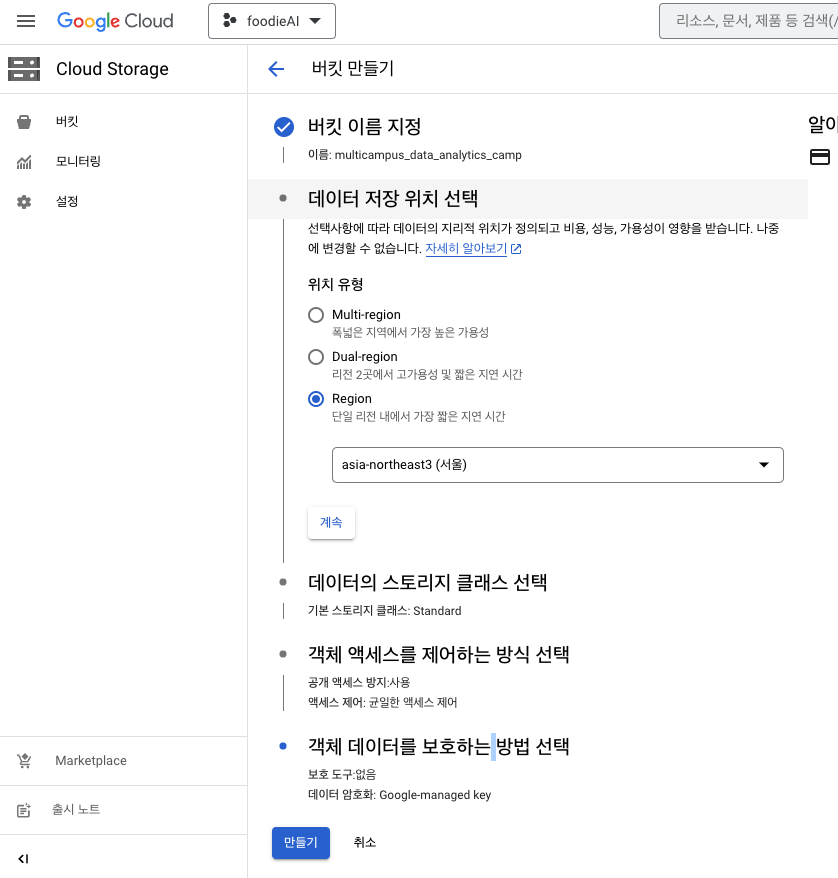

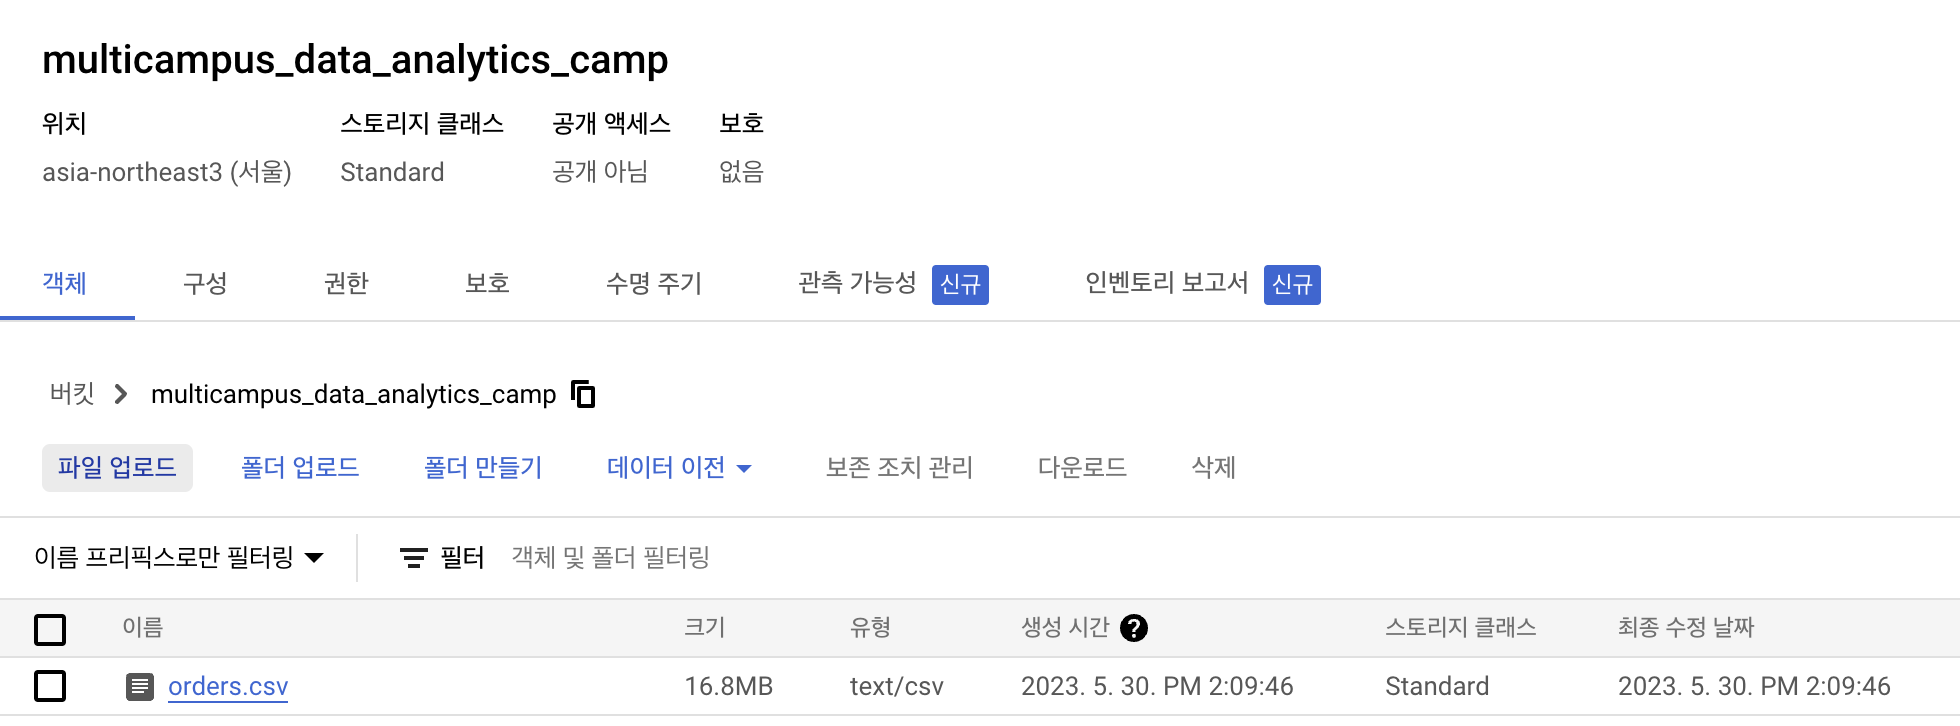

## Bigquery에서 데이터 파일 import

데이터 추가 버튼을 누른 뒤, Google Cloud Storage 선택

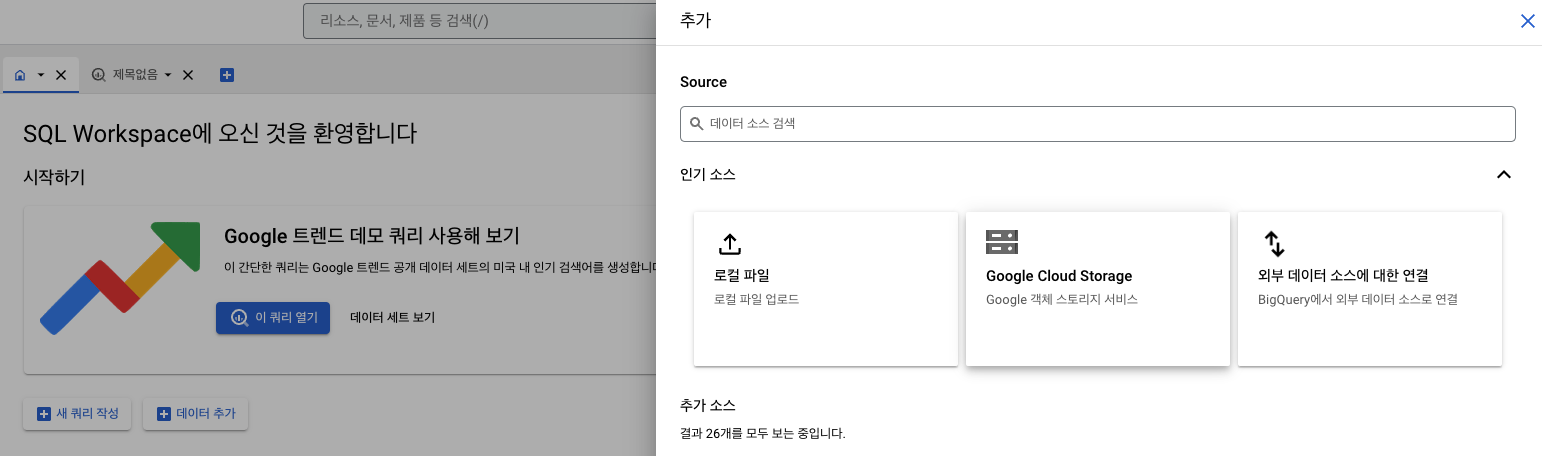

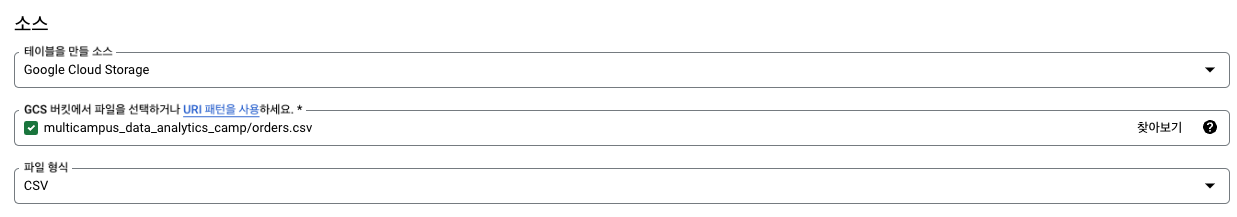

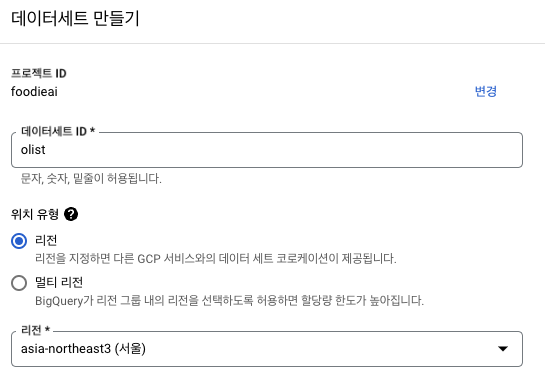

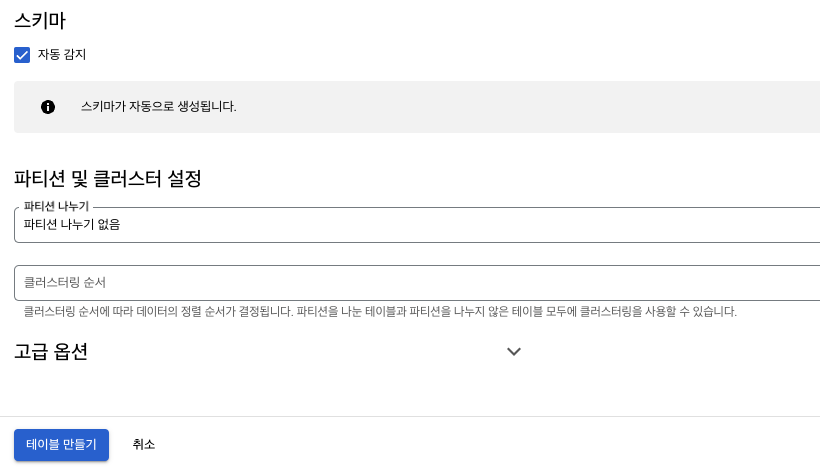

import 된 테이블을 확인합니다.

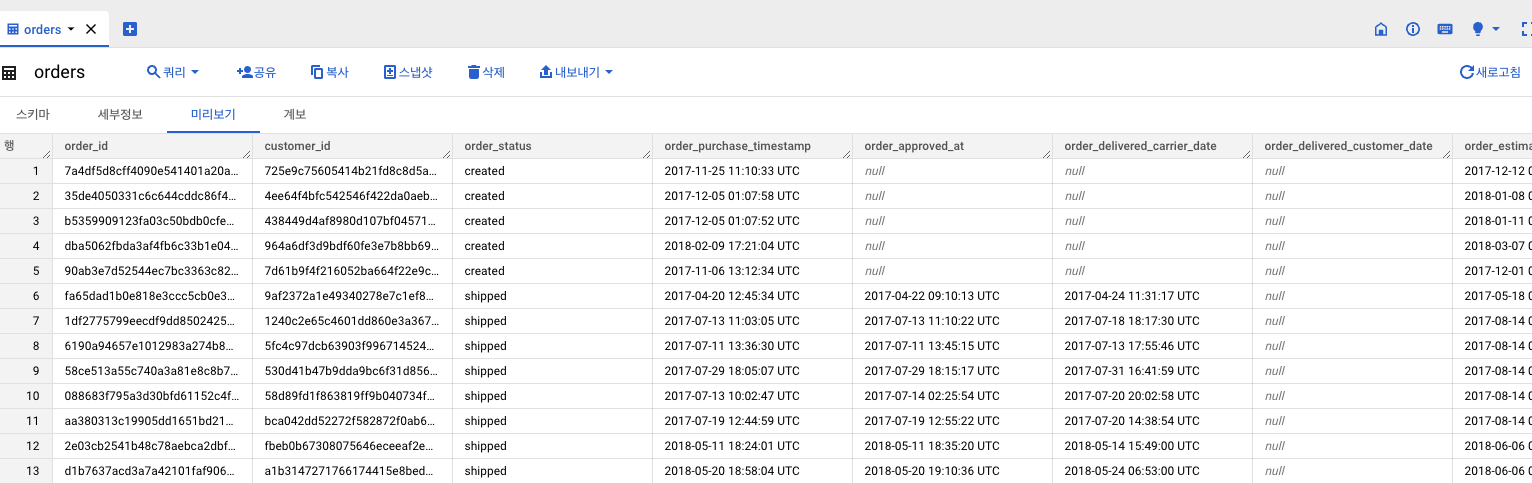

## Bigquery Console에서 Query 날리기

일자별 주문 건수 집계

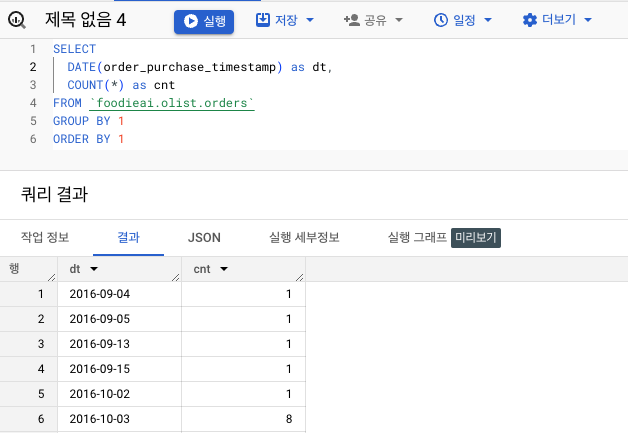

## Bigquery의 장점
- bigquery는 SQL 문을 이용해서 대용량 데이터를 분석하는데 적합합니다.
- 여러 사람이 같은 데이터 베이스에서 작업을 할 때 서로의 작업물을 공유하는 것이 편리합니다.

## python 코드 상에서 접근

python 코드에서 mysql에 쿼리를 날렸던 것처럼 bigquery에도 쿼리를 날릴 수 있습니다.

### 서비스 계정 생성

python 코드에서 bigquery에 접근하려면 마치 DB에 접속하기 위해 아이디와 비밀번호를 입력했던 것처럼 서비스 계정이 필요합니다.  
GCP console에서 IAM > 서비스 계정으로 들어가보겠습니다.

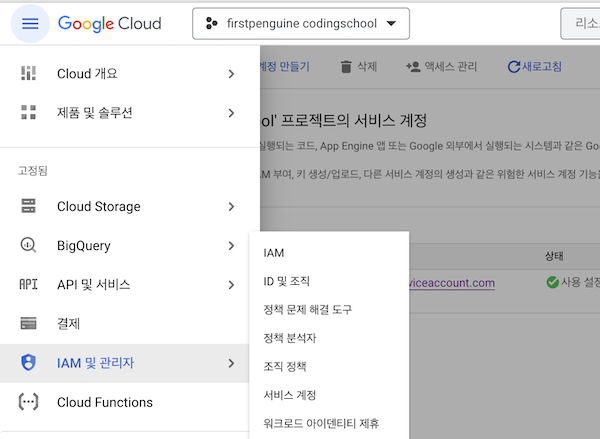

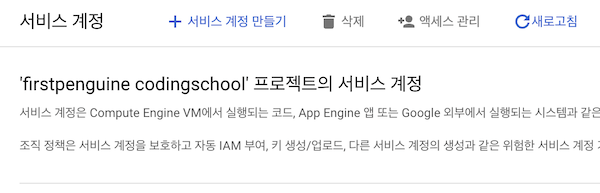

서비스 계정 이름을 지정하고 반드시 Bigquery 관리자 역할을 부여해준 다음 생성해줍니다.

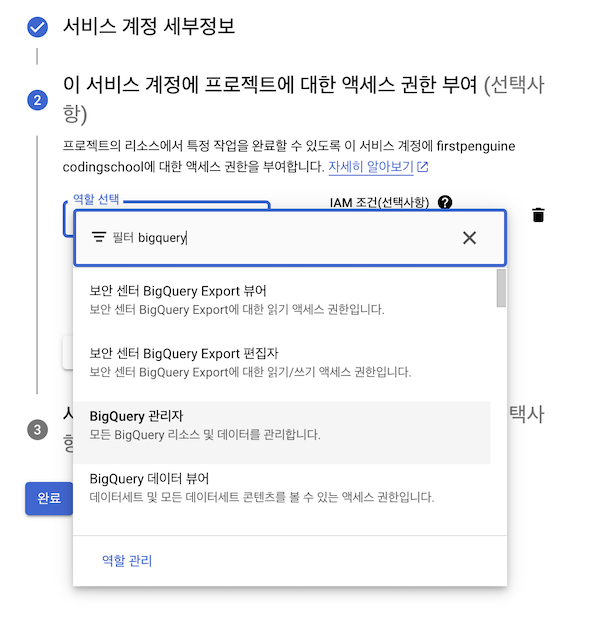

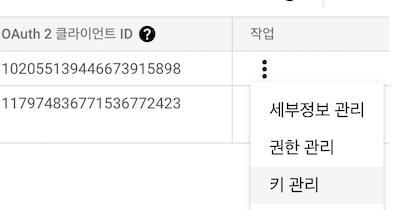

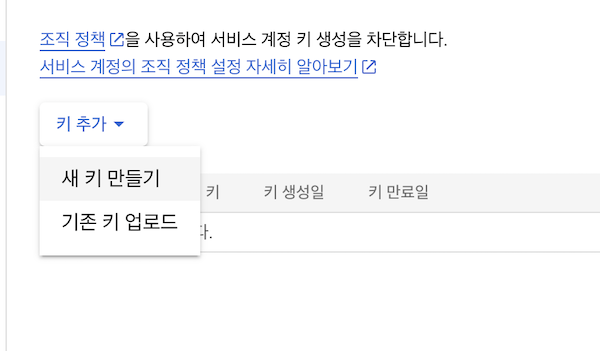

JSON 포맷을 선택해서 다운받아주고, 파일명을 key.json으로 변경해준 뒤 data 폴더 아래에 넣어줍니다.

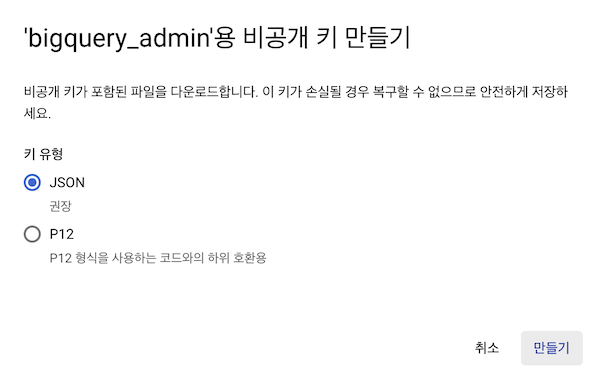

### python에서 bigquery 접속하기

In [13]:
!pip install google-cloud-bigquery google-auth db-dtypes


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file('./data/key.json')

In [2]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials=credentials, 
    project=credentials.project_id
)

In [3]:
# Perform a query.
sql = """
SELECT
  DATE(order_purchase_timestamp) as dt,
  COUNT(*) AS cnt
FROM
  `firstpenguine-codingschool.olist.olist_orders`
GROUP BY 1
ORDER BY 1
"""
df = client.query(sql).to_dataframe()
df

,dt,cnt
0,2016-09-04,1
1,2016-09-05,1
2,2016-09-13,1
3,2016-09-15,1
4,2016-10-02,1
...,...,...
629,2018-09-29,1
630,2018-10-01,1
631,2018-10-03,1
632,2018-10-16,1


<Axes: xlabel='dt'>

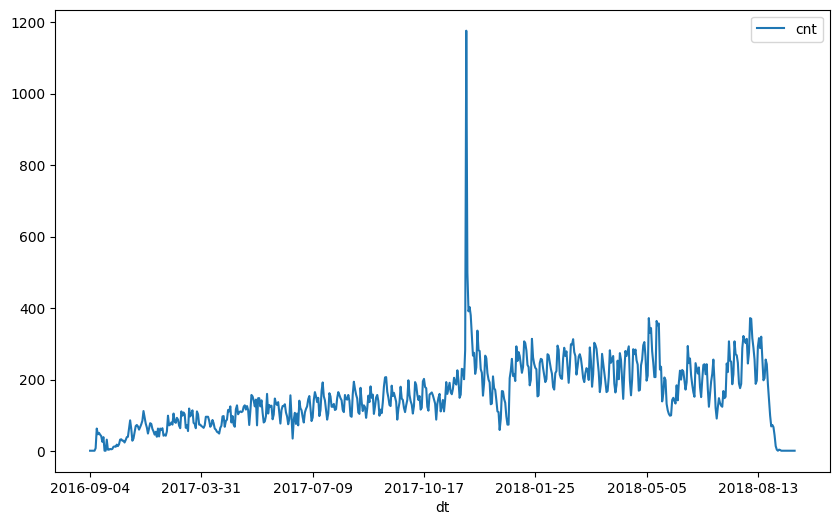

In [12]:
df.set_index("dt").plot(figsize=(10, 6))

## 정리

이상으로 데이터 셋을 bigquery에 올리고, 파이썬 코드 상에서 접근하는 방법을 알아보았습니다.  
빅쿼리는 데이터 분석 프로젝트를 협업으로 진행할 때 굉장히 유용한 도구입니다.  
사용법을 잘 숙지하셔서 요긴하게 사용하시기 바랍니다.